# HIC DIVERSITY

In [8]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [9]:
data = pd.read_csv('../summary_data/diversity_summary.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data['dist']=np.where(data['Diversity']=='max', 1.0, data['Diversity'])
data['dist']= data['dist'].astype(float)

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency', 'Diversity'],
      dtype='object')


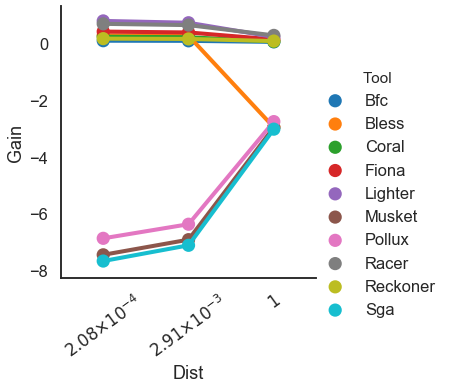

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="dist", y="Base Gain", kind="point",data = data , hue='Tool')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tc = [u"${}$".format(tick.format_data(x)) for x in data['dist']]
g.set(xlabel='Dist', ylabel='Gain',xticklabels=tc)

g.set_xticklabels(rotation=36)
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/diverse_gain.png", bbox_inches='tight')

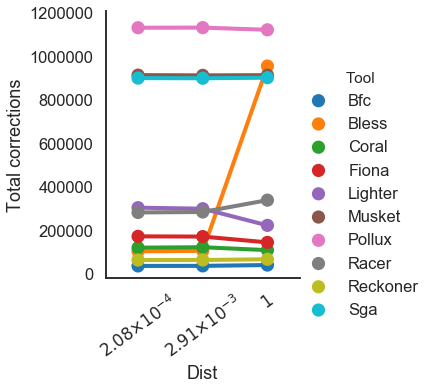

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="dist", y="total_corrections", kind="point",data = data , hue='Tool')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tc = [u"${}$".format(tick.format_data(x)) for x in data['dist']]
g.set(xlabel='Dist', ylabel='Total corrections',xticklabels=tc)

g.set_xticklabels(rotation=36)
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/diverse_total_corrections.png", bbox_inches='tight')


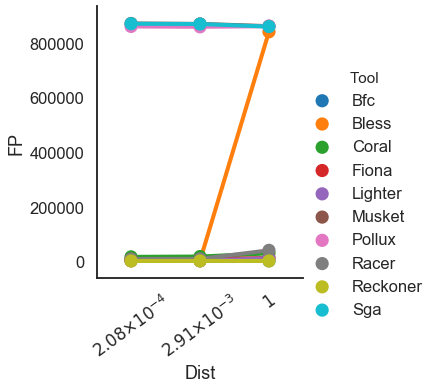

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="dist", y="Base - FP", kind="point",data = data , hue='Tool')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tc = [u"${}$".format(tick.format_data(x)) for x in data['dist']]
g.set(xlabel='Dist', ylabel='FP',xticklabels=tc)

g.set_xticklabels(rotation=36)
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/diverse_fp.png", bbox_inches='tight')


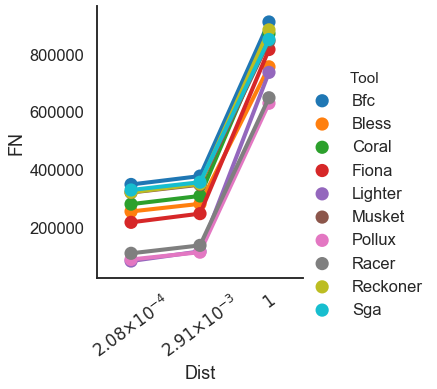

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="dist", y="Base - FN", kind="point",data = data , hue='Tool')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tc = [u"${}$".format(tick.format_data(x)) for x in data['dist']]
g.set(xlabel='Dist', ylabel='FN',xticklabels=tc)

g.set_xticklabels(rotation=36)
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/diverse_fn.png", bbox_inches='tight')


The value 1 for dist is not correct. Sergey didn'y provide the value of dist max.


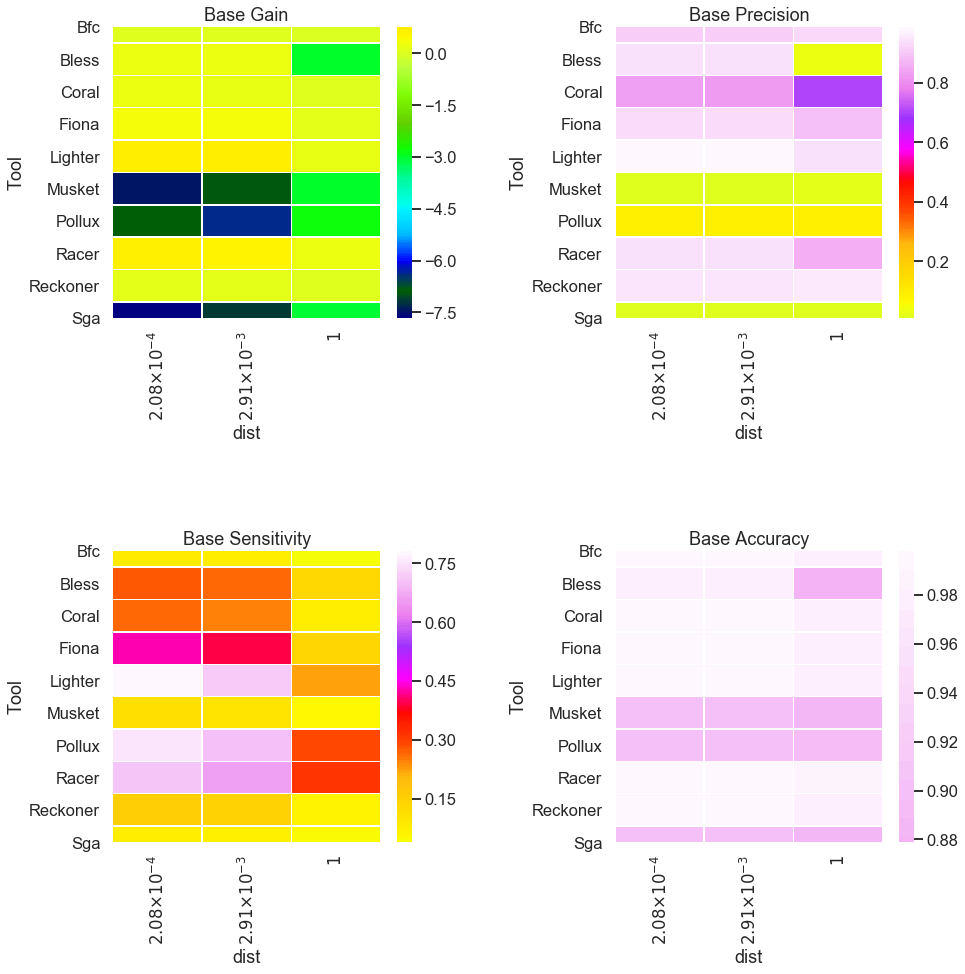

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
g=sns.set_style("white")
g=sns.set_context("talk")

result = data
#data[(data['Kmer Size'] == 30) | (data['Kmer Size'] == 9181)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=0.8,wspace = 0.5)
#fig.suptitle('Gain')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tc = [u"${}$".format(tick.format_data(x)) for x in data['dist'].unique()]

attributes=('Base Gain', 'Base Precision', 'Base Sensitivity', 'Base Accuracy')

print("The value 1 for dist is not correct. Sergey didn'y provide the value of dist max.")

index=0
for ax in axes.flatten():   
    result_= result.pivot(index='Tool', columns='dist', values=attributes[index])
    g=sns.heatmap(result_, fmt="g", cmap='gist_ncar',center=0,linewidths=.5, ax=ax, xticklabels=tc)
    g.set(title=attributes[index])
    index+=1

